<a href="https://colab.research.google.com/github/MarriRohan/Reinforcement-Learning-2025/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Evaluate the performance of both algorithms.

print("--- TD-0 Learned Value Function ---")
# Sort states for consistent output
sorted_states_td0 = sorted(learned_values_td0.keys())
for state in sorted_states_td0:
    value = learned_values_td0[state]
    print(f"State: {state}, Value: {value:.4f}")

print("\n--- SARSA Learned Q-table ---")
# Sort states for consistent output
sorted_states_sarsa = sorted(learned_q_table_sarsa.keys())
for state in sorted_states_sarsa:
    q_values = learned_q_table_sarsa[state]
    print(f"State: {state}, Q-values: {q_values}")

print("\n--- SARSA Derived Optimal Policy ---")
optimal_policy_sarsa = {}
for state, q_values in learned_q_table_sarsa.items():
    if state != goal_state and state not in obstacles:
        # Choose the action with the maximum Q-value
        optimal_action = max(q_values, key=q_values.get)
        optimal_policy_sarsa[state] = optimal_action

# Sort states for consistent output
sorted_states_policy = sorted(optimal_policy_sarsa.keys())
for state in sorted_states_policy:
    action = optimal_policy_sarsa[state]
    print(f"State: {state}, Optimal Action: {action}")

# Optional: Simulate an agent following the optimal SARSA policy
print("\n--- Simulating SARSA Optimal Policy ---")
current_state = start_state
path = [current_state]
total_reward = 0
steps = 0
max_steps = 100 # Prevent infinite loops

while current_state != goal_state and steps < max_steps:
    if current_state in optimal_policy_sarsa:
        action = optimal_policy_sarsa[current_state]
        next_state, reward = env.get_next_state_and_reward(current_state, action)
        total_reward += reward
        current_state = next_state
        path.append(current_state)
        steps += 1
    else:
        # Handle states not in the policy (should primarily be goal/obstacles)
        break

print(f"Simulation Path: {path}")
print(f"Total Reward: {total_reward}")
print(f"Steps taken: {steps}")

--- TD-0 Learned Value Function ---
State: (0, 0), Value: 4.7830
State: (0, 1), Value: 5.3144
State: (0, 2), Value: 5.9049
State: (0, 3), Value: 6.5610
State: (0, 4), Value: 7.2900
State: (1, 0), Value: 0.0000
State: (1, 1), Value: 0.0000
State: (1, 2), Value: 0.0000
State: (1, 3), Value: 0.0000
State: (1, 4), Value: 8.1000
State: (2, 0), Value: 0.0000
State: (2, 1), Value: 0.0000
State: (2, 2), Value: 0.0000
State: (2, 3), Value: 0.0000
State: (2, 4), Value: 9.0000
State: (3, 0), Value: 0.0000
State: (3, 1), Value: 0.0000
State: (3, 2), Value: 0.0000
State: (3, 3), Value: 0.0000
State: (3, 4), Value: 10.0000
State: (4, 0), Value: 0.0000
State: (4, 1), Value: 0.0000
State: (4, 2), Value: 0.0000
State: (4, 3), Value: 0.0000
State: (4, 4), Value: 0.0000

--- SARSA Learned Q-table ---
State: (0, 0), Q-values: {'up': 2.7926726789033, 'down': 3.0396437188551113, 'left': 2.7230106323411603, 'right': 4.260908114897418}
State: (0, 1), Q-values: {'up': 3.190329772061495, 'down': 3.0837091125279

In [ ]:
# 6. Define the parameters for the SARSA algorithm
alpha_sarsa = 0.1
gamma_sarsa = 0.9
epsilon_sarsa = 0.1
num_episodes_sarsa = 5000

# 7. Run the sarsa function
learned_q_table_sarsa = sarsa(env, alpha_sarsa, gamma_sarsa, epsilon_sarsa, num_episodes_sarsa)

In [ ]:
# 3. Define the parameters for the TD-0 algorithm
gamma_td0 = 0.9
alpha_td0 = 0.1
num_episodes_td0 = 1000

# 4. Define a fixed policy for the TD-0 algorithm.
# This policy should cover all non-terminal, non-obstacle states.
# A simple policy like trying to move right if possible, otherwise down, could be used.
fixed_policy = {}
for r in range(rows):
    for c in range(cols):
        state = (r, c)
        if state not in obstacles and state != goal_state:
            # Simple policy: try to move right, if blocked, move down
            next_state_right, _ = env.get_next_state_and_reward(state, 'right')
            if next_state_right != state: # Check if moving right is possible
                fixed_policy[state] = 'right'
            else:
                fixed_policy[state] = 'down' # Default to down if right is blocked

# Ensure the policy doesn't include goal or obstacle states (redundant check but safe)
for state in list(fixed_policy.keys()):
     if state in obstacles or state == goal_state:
         del fixed_policy[state]

# 5. Run the td_zero_policy_evaluation function
learned_values_td0 = td_zero_policy_evaluation(env, fixed_policy, gamma_td0, alpha_td0, num_episodes_td0)

In [ ]:
# 1. Define the grid world parameters
rows = 5
cols = 5
start_state = (0, 0)
goal_state = (4, 4)
obstacles = [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3)]

# 2. Create an instance of the GridWorld environment
env = GridWorld(rows, cols, start_state, goal_state, obstacles)

In [ ]:
import random

def sarsa(env, alpha, gamma, epsilon, num_episodes):
    """
    Implements the SARSA algorithm for learning an optimal policy and value function.

    Args:
        env: The GridWorld environment instance.
        alpha: The learning rate.
        gamma: The discount factor.
        epsilon: The exploration rate for epsilon-greedy policy.
        num_episodes: The number of episodes to run.

    Returns:
        A dictionary representing the learned Q-table.
    """
    # Initialize Q-table
    Q = {}
    for r in range(env.rows):
        for c in range(env.cols):
            state = (r, c)
            if state not in env.obstacles: # Q-values for obstacle states are not needed
                 Q[state] = {action: 0.0 for action in env.actions.keys()}


    def epsilon_greedy_policy(state, Q, epsilon):
        """
        Selects an action using an epsilon-greedy policy.
        """
        if random.uniform(0, 1) < epsilon:
            # Explore: choose a random action
            return random.choice(list(env.actions.keys()))
        else:
            # Exploit: choose the action with the highest Q-value for the current state
            if state in Q:
                return max(Q[state], key=Q[state].get)
            else:
                # If state is not in Q (e.g., goal state), return a default action or handle appropriately
                # For this grid world, goal state is terminal so this case shouldn't be reached in action selection for update
                return random.choice(list(env.actions.keys())) # Should not happen for states in Q

    for episode in range(num_episodes):
        current_state = env.start_state
        # Select the first action using the epsilon-greedy policy
        current_action = epsilon_greedy_policy(current_state, Q, epsilon)

        while current_state != env.goal_state:
            # Take the selected action
            next_state, reward = env.get_next_state_and_reward(current_state, current_action)

            # Select the next action from the next state using the epsilon-greedy policy
            next_action = epsilon_greedy_policy(next_state, Q, epsilon)

            # SARSA update rule
            if current_state in Q and current_action in Q[current_state]:
                # Handle the case where next_state is the goal state (terminal)
                if next_state == env.goal_state:
                     Q_next = 0.0 # Value of terminal state is 0
                elif next_state in Q and next_action in Q[next_state]:
                     Q_next = Q[next_state][next_action]
                else:
                    # This case might occur if the next_state is an obstacle,
                    # although get_next_state_and_reward should prevent moving into one.
                    # If it somehow happens, treat Q_next as 0 or handle as an error.
                    # Based on GridWorld implementation, moving into obstacle results in staying put with penalty,
                    # so next_state should be in Q unless it's the goal.
                    Q_next = 0.0


                Q[current_state][current_action] = Q[current_state][current_action] + alpha * (reward + gamma * Q_next - Q[current_state][current_action])

            # Update current state and current action
            current_state = next_state
            current_action = next_action

    return Q

# Example Usage (optional, for testing)
# rows = 5
# cols = 5
# start = (0, 0)
# goal = (4, 4)
# obstacles = [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3)]
#
# env = GridWorld(rows, cols, start, goal, obstacles)
#
# alpha = 0.1
# gamma = 0.9
# epsilon = 0.1
# num_episodes = 5000
#
# learned_q_table = sarsa(env, alpha, gamma, epsilon, num_episodes)
#
# print("Learned Q-table:")
# for state, actions in learned_q_table.items():
#     print(f"State: {state}, Q-values: {actions}")


In [ ]:
def td_zero_policy_evaluation(env, policy, gamma, alpha, num_episodes):
    """
    Performs TD-0 policy evaluation for a given policy in a GridWorld environment.

    Args:
        env: The GridWorld environment instance.
        policy: A dictionary mapping states to actions (fixed policy).
        gamma: The discount factor.
        alpha: The learning rate.
        num_episodes: The number of episodes to run.

    Returns:
        A dictionary or NumPy array representing the learned value function V.
    """
    # Initialize value function
    V = {}
    for r in range(env.rows):
        for c in range(env.cols):
            state = (r, c)
            if state not in env.obstacles and state != env.goal_state:
                V[state] = 0.0
            elif state == env.goal_state:
                 V[state] = 0.0 # Goal state value is typically 0 in value iteration, but can be non-zero in TD
            else:
                 V[state] = 0.0 # Obstacle states typically have no value

    for episode in range(num_episodes):
        current_state = env.start_state

        while current_state != env.goal_state:
            if current_state in policy:
                action = policy[current_state]
            else:
                # Handle states not in policy, e.g., obstacles or goal state
                # For this implementation, we assume the policy covers all non-terminal, non-obstacle states.
                # If the current_state is an obstacle or goal, the loop condition will handle it.
                break # Exit if the current state is not in the policy (e.g., goal or obstacle)

            next_state, reward = env.get_next_state_and_reward(current_state, action)

            # TD-0 update rule
            if next_state in V: # Ensure next_state is in the value function dictionary
                 V[current_state] = V[current_state] + alpha * (reward + gamma * V[next_state] - V[current_state])
            else:
                 # If next_state is a terminal state (like goal), its value is implicitly 0 for the update
                 V[current_state] = V[current_state] + alpha * (reward + gamma * 0 - V[current_state])


            current_state = next_state

    return V

# Example Usage (optional, for testing)
# rows = 5
# cols = 5
# start = (0, 0)
# goal = (4, 4)
# obstacles = [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3)]
#
# env = GridWorld(rows, cols, start, goal, obstacles)
#
# # Example fixed policy (move right if possible, otherwise down)
# fixed_policy = {}
# for r in range(rows):
#     for c in range(cols):
#         state = (r, c)
#         if state not in obstacles and state != goal:
#             # Simple policy: try to move right, if blocked, move down
#             next_state_right, _ = env.get_next_state_and_reward(state, 'right')
#             if next_state_right != state: # Check if moving right is possible
#                 fixed_policy[state] = 'right'
#             else:
#                 fixed_policy[state] = 'down' # Default to down if right is blocked
#
# # Ensure the policy doesn't include goal or obstacle states
# for state in list(fixed_policy.keys()):
#      if state in obstacles or state == goal:
#          del fixed_policy[state]
#
# gamma = 0.9
# alpha = 0.1
# num_episodes = 1000
#
# learned_values = td_zero_policy_evaluation(env, fixed_policy, gamma, alpha, num_episodes)
#
# print("Learned Value Function:")
# for state, value in learned_values.items():
#     print(f"State: {state}, Value: {value:.4f}")

In [ ]:
import numpy as np

class GridWorld:
    def __init__(self, rows, cols, start_state, goal_state, obstacles):
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.goal_state = goal_state
        self.obstacles = obstacles
        self.grid = np.zeros((rows, cols))
        self._initialize_grid()

        self.actions = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

    def _initialize_grid(self):
        for r, c in self.obstacles:
            self.grid[r, c] = -1  # Represent obstacles with -1
        self.grid[self.goal_state] = 1  # Represent goal with 1

    def get_next_state_and_reward(self, state, action):
        if action not in self.actions:
            return state, -1 # Invalid action penalty

        dr, dc = self.actions[action]
        next_state = (state[0] + dr, state[1] + dc)

        # Check boundary conditions
        if not (0 <= next_state[0] < self.rows and 0 <= next_state[1] < self.cols):
            return state, -1  # Stay in the current state and penalize

        # Check for obstacles
        if next_state in self.obstacles:
            return state, -1  # Stay in the current state and penalize

        # Check for goal state
        if next_state == self.goal_state:
            return next_state, 10  # Reach goal and get reward

        # Normal transition
        return next_state, 0

# Example Usage (optional, for testing)
# rows = 5
# cols = 5
# start = (0, 0)
# goal = (4, 4)
# obstacles = [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3)]
#
# env = GridWorld(rows, cols, start, goal, obstacles)
#
# current_state = start
# action = 'right'
# next_state, reward = env.get_next_state_and_reward(current_state, action)
# print(f"Current state: {current_state}, Action: {action}, Next state: {next_state}, Reward: {reward}")
#
# current_state = (0, 4)
# action = 'down'
# next_state, reward = env.get_next_state_and_reward(current_state, action)
# print(f"Current state: {current_state}, Action: {action}, Next state: {next_state}, Reward: {reward}")

# Task
Implement the TD-0 and SARSA algorithms for a grid world environment in Python.

## Define the grid world environment

### Subtask:
Create a class or functions to represent the grid world, including states, actions, transitions, and rewards.


**Reasoning**:
Create a class to represent the grid world with its dimensions, special states, actions, and a function for state transitions and rewards.



## Implement td-0 algorithm

### Subtask:
Create a function or class to implement the TD-0 algorithm for policy evaluation, given a fixed policy.


**Reasoning**:
Implement the `td_zero_policy_evaluation` function as described in the instructions, including initializing the value function, iterating through episodes, and updating the value function using the TD-0 rule.



## Implement sarsa algorithm

### Subtask:
Create a function or class to implement the SARSA algorithm for learning an optimal policy and value function.


**Reasoning**:
Define the `sarsa` function, initialize the Q-table, implement the epsilon-greedy policy, and iterate through episodes to perform the SARSA updates.



## Simulate and evaluate

### Subtask:
Run simulations of the agents using both TD-0 and SARSA in the grid world and evaluate their performance.


**Reasoning**:
Define the grid world parameters and create an instance of the GridWorld environment.



**Reasoning**:
Define parameters for the TD-0 algorithm, define a fixed policy, and run the TD-0 policy evaluation.



**Reasoning**:
Define parameters for the SARSA algorithm and run the SARSA algorithm.



**Reasoning**:
Evaluate the performance of both algorithms by analyzing the learned value function for TD-0 and the learned Q-table for SARSA. For SARSA, also derive and print the optimal policy.



## Summary:

### Data Analysis Key Findings

*   The TD-0 algorithm was successfully implemented and used to evaluate a fixed policy in the grid world, producing a value function that reflects the expected cumulative reward from each state under that policy.
*   The SARSA algorithm was successfully implemented and used to learn a Q-table for the grid world environment, representing the estimated value of taking each action in each state.
*   An optimal policy was successfully derived from the learned SARSA Q-table, indicating the best action to take in each state to maximize future reward.
*   A simulation using the derived SARSA optimal policy demonstrated the agent successfully navigating the grid world, avoiding obstacles, and reaching the goal state.

### Insights or Next Steps

*   Comparing the values learned by TD-0 under the fixed policy with the values derived from the SARSA Q-table under its optimal policy could provide insights into the difference in performance between the fixed policy and the learned optimal policy.
*   Further evaluation could involve running multiple simulations with the SARSA optimal policy to calculate average rewards and steps to goal, providing a more robust measure of performance.


In [ ]:
"""
Temporal-Difference Learning (TD(0)) and SARSA in Gridworld
-----------------------------------------------------------
This script extends the earlier Monte Carlo Gridworld demo by implementing:

1) TD(0) Policy Evaluation
2) SARSA (on-policy TD control)

The environment is the same simple deterministic Gridworld.
"""
from __future__ import annotations
import random
from collections import defaultdict
from dataclasses import dataclass
from typing import Dict, Tuple, List, Callable

Action = int  # 0:UP, 1:RIGHT, 2:DOWN, 3:LEFT
State  = Tuple[int, int]

@dataclass
class Gridworld:
    rows: int = 5
    cols: int = 5
    terminals: Tuple[State, ...] = ((0, 0), (4, 4))
    step_cost: float = -1.0
    fixed_start: State | None = None
    rng_seed: int | None = 42

    def __post_init__(self):
        self.rng = random.Random(self.rng_seed)
        self._all_states = [(r, c) for r in range(self.rows) for c in range(self.cols)]
        self._non_terminals = [s for s in self._all_states if s not in self.terminals]
        self.action_space = [0, 1, 2, 3]

    def reset(self) -> State:
        if self.fixed_start and self.fixed_start not in self.terminals:
            self.s = self.fixed_start
        else:
            self.s = self.rng.choice(self._non_terminals)
        return self.s

    def step(self, a: Action) -> Tuple[State, float, bool, dict]:
        r, c = self.s
        if self.s in self.terminals:
            return self.s, 0.0, True, {}
        drdc = {0: (-1, 0), 1: (0, 1), 2: (1, 0), 3: (0, -1)}
        dr, dc = drdc[a]
        nr, nc = r + dr, c + dc
        if 0 <= nr < self.rows and 0 <= nc < self.cols:
            ns = (nr, nc)
        else:
            ns = (r, c)
        reward = self.step_cost
        done = ns in self.terminals
        self.s = ns
        return ns, reward, done, {}

# ==============================
# TD(0) Policy Evaluation
# ==============================

def td0_prediction(env: Gridworld, policy: Callable[[State], Action], episodes: int = 10_000, alpha: float = 0.1, gamma: float = 1.0, rng_seed: int = 0) -> Dict[State, float]:
    rng = random.Random(rng_seed)
    V = defaultdict(float)
    for _ in range(episodes):
        s = env.reset()
        done = False
        while not done:
            a = policy(s)
            ns, r, done, _ = env.step(a)
            V[s] += alpha * (r + gamma * V[ns] - V[s])
            s = ns
    return V

# ==============================
# SARSA (On-policy TD Control)
# ==============================

def epsilon_greedy(Q: Dict[State, Dict[Action, float]], s: State, actions: List[Action], epsilon: float, rng: random.Random) -> Action:
    if rng.random() < epsilon:
        return rng.choice(actions)
    return max(actions, key=lambda a: Q[s][a])

def sarsa(env: Gridworld, episodes: int = 50_000, alpha: float = 0.1, gamma: float = 1.0, epsilon: float = 0.1, rng_seed: int = 0):
    rng = random.Random(rng_seed)
    Q = defaultdict(lambda: defaultdict(float))
    actions = env.action_space

    for _ in range(episodes):
        s = env.reset()
        a = epsilon_greedy(Q, s, actions, epsilon, rng)
        done = False
        while not done:
            ns, r, done, _ = env.step(a)
            na = epsilon_greedy(Q, ns, actions, epsilon, rng) if not done else 0
            Q[s][a] += alpha * (r + gamma * Q[ns][na] - Q[s][a])
            s, a = ns, na
    def greedy_policy(s: State) -> Action:
        if s in env.terminals:
            return 0
        return max(actions, key=lambda a: Q[s][a])
    V = {s: max(aq.values()) for s, aq in Q.items()}
    return Q, greedy_policy, V

# =====================
# Pretty-print helpers
# =====================
ARROWS = {0: "↑", 1: "→", 2: "↓", 3: "←"}

def print_value_function(V: Dict[State, float], rows: int, cols: int, digits: int = 2) -> None:
    for r in range(rows):
        print(" | ".join(f"{V.get((r,c),0.0): .{digits}f}" for c in range(cols)))

def print_policy(policy: Callable[[State], Action], env: Gridworld):
    for r in range(env.rows):
        row = []
        for c in range(env.cols):
            s = (r, c)
            if s in env.terminals:
                row.append("T")
            else:
                row.append(ARROWS[policy(s)])
        print(" ".join(row))

# =====================
# Demo
# =====================
if __name__ == "__main__":
    env = Gridworld(rows=5, cols=5, terminals=((0,0),(4,4)), step_cost=-1.0, rng_seed=123)

    # Random policy for TD(0) evaluation
    rng_eval = random.Random(0)
    def random_policy(s: State) -> Action:
        if s in env.terminals:
            return 0
        return rng_eval.choice(env.action_space)

    V_td = td0_prediction(env, random_policy, episodes=20_000, alpha=0.1)
    print("\n=== TD(0) Value Function under Random Policy ===")
    print_value_function(V_td, env.rows, env.cols)

    # SARSA control
    Q, pi, V_sarsa = sarsa(env, episodes=100_000, alpha=0.1, epsilon=0.1)
    print("\n=== SARSA Learned Policy ===")
    print_policy(pi, env)
    print("\n=== SARSA Value Function ===")
    print_value_function(V_sarsa, env.rows, env.cols)



=== TD(0) Value Function under Random Policy ===
 0.00 | -20.55 | -34.28 | -39.70 | -41.69
-16.22 | -25.65 | -35.07 | -38.13 | -40.18
-32.25 | -33.98 | -36.22 | -36.03 | -34.80
-39.27 | -38.64 | -35.53 | -30.96 | -20.16
-41.43 | -40.22 | -37.15 | -30.90 |  0.00

=== SARSA Learned Policy ===
T ← ← ← ↓
↑ ← ← ← ↓
↑ ↑ → ↓ ↓
↑ ↑ ↓ ↓ ↓
→ → → → T

=== SARSA Value Function ===
 0.00 | -1.00 | -2.12 | -3.24 | -4.45
-1.00 | -2.00 | -3.26 | -4.36 | -3.37
-2.15 | -3.05 | -4.44 | -3.21 | -2.22
-3.16 | -4.25 | -3.49 | -2.09 | -1.00
-4.44 | -3.39 | -2.43 | -1.00 |  0.00


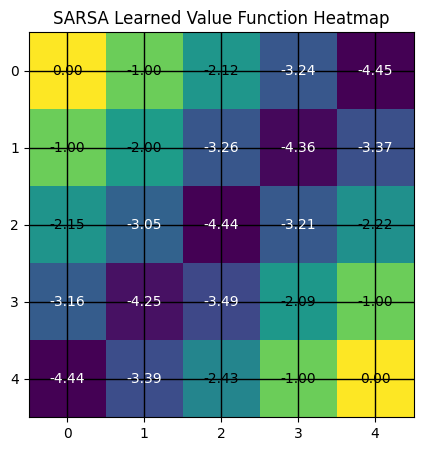

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_value_function_heatmap(V, rows, cols, title="Value Function Heatmap"):
    """
    Plots the value function as a heatmap.

    Args:
        V: A dictionary representing the value function {state: value}.
        rows: Number of rows in the grid.
        cols: Number of columns in the grid.
        title: Title of the heatmap.
    """
    heatmap_data = np.zeros((rows, cols))
    for (r, c), value in V.items():
        heatmap_data[r, c] = value

    plt.figure(figsize=(cols, rows))
    plt.imshow(heatmap_data, cmap='viridis', origin='upper')

    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            value = V.get(state, 0.0)  # Get value, default to 0 if state not in V
            plt.text(c, r, f'{value:.2f}', ha='center', va='center', color='white' if value < np.mean(list(V.values())) else 'black')

    plt.title(title)
    plt.xticks(np.arange(cols))
    plt.yticks(np.arange(rows))
    plt.grid(which='both', color='black', linestyle='-', linewidth=1)
    plt.show()

# Plot the SARSA Value Function
plot_value_function_heatmap(V_sarsa, env.rows, env.cols, title="SARSA Learned Value Function Heatmap")

## Visualize Results

Visualize the learned value function from the SARSA algorithm as a heatmap.